In [68]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from utils.graph_generator import get_graph

In [96]:
#nx.algorithms.tree.mst.maximum_spanning_edges


graph = get_graph(type="KSH",
                  args={"nodes":"KSHSettlList_settlID_settlname_pop_lat_lon.csv",
                   "edges":"KSHCommuting_c1ID_c1name_c2ID_c2name_comm_school_work_UNDIR.csv",
                    "directed":False,
                    "thresholds":{
                        "node":3000,
                        "edge":1,
                        "edge_factor":1,
                        "node_factor":1
                    }},
                 )

Number of cities:  491


In [97]:
edges = list(nx.algorithms.tree.mst.maximum_spanning_edges(graph))

subgraph = graph.edge_subgraph([(e[0],e[1]) for e in edges])

In [103]:
def plot_graph(graph):
    pos = nx.get_node_attributes(graph,"pos")
    pop = nx.get_node_attributes(graph,"population")
    pop = np.array([pop[n] for n in graph.nodes])

    plt.figure(figsize=(15,8))
    nx.draw(graph, node_size=pop*0.003, pos=pos)

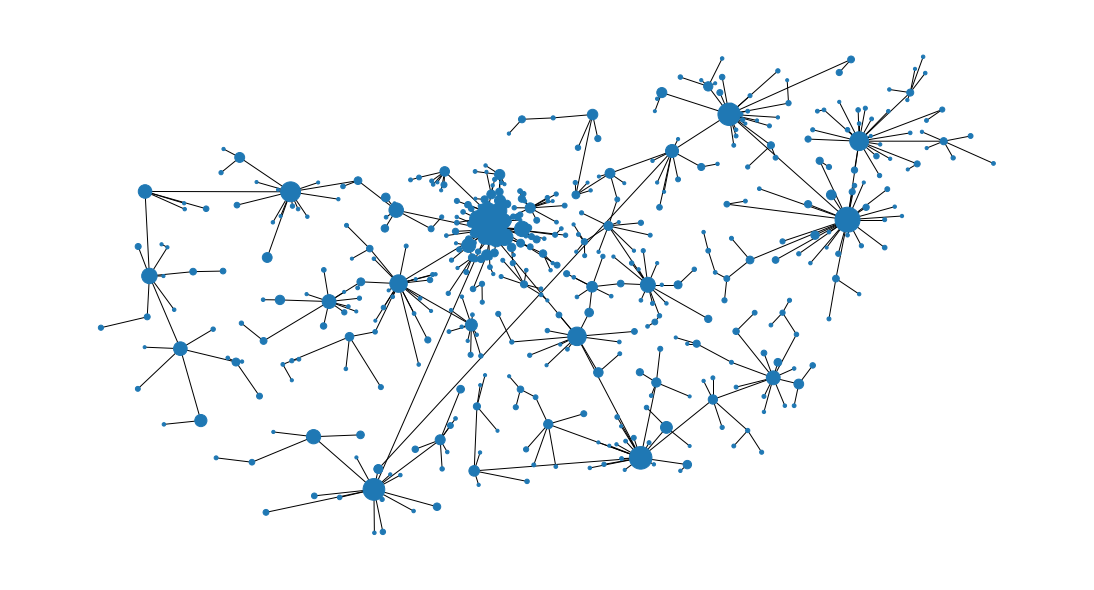

In [104]:
plot_graph(subgraph)

In [105]:
graph = get_graph(type="KSH",
                  args={"nodes":"KSHSettlList_settlID_settlname_pop_lat_lon.csv",
                   "edges":"KSHCommuting_c1ID_c1name_c2ID_c2name_comm_school_work_UNDIR.csv",
                    "directed":False,
                    "thresholds":{
                        "node":0,
                        "edge":25,
                        "edge_factor":1,
                        "node_factor":1
                    }},
                 )

#edges = list(nx.algorithms.tree.mst.maximum_spanning_edges(graph))

for e in edges:
    graph.add_edge(e[0],e[1], weight=e[2]['weight'])


Number of cities:  2661


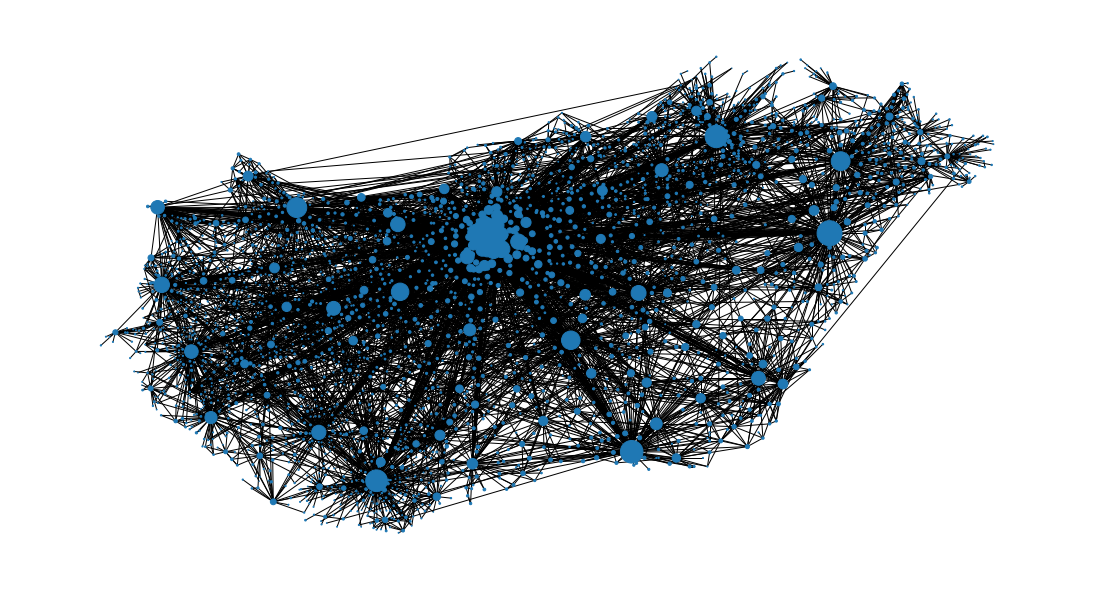

In [106]:
plot_graph(graph)

In [107]:
nx.diameter(graph)

7

In [112]:
d=dict(nx.all_pairs_shortest_path_length(graph))

In [113]:
d[0][1]

3